# First Name:guoping
# Last Name:Li

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nesarc = pd.read_csv('nesarc.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

# From Prac 1
# Columns/Data used in Prac 1

In [3]:
nesarc['S2AQ5B'] = pd.to_numeric(nesarc['S2AQ5B'], errors='coerce') #convert variable to numeric
nesarc['S2AQ5D'] = pd.to_numeric(nesarc['S2AQ5D'], errors='coerce') #convert variable to numeric
nesarc['S2AQ5A'] = pd.to_numeric(nesarc['S2AQ5A'], errors='coerce') #convert variable to numeric
nesarc['S2BQ1B1'] = pd.to_numeric(nesarc['S2BQ1B1'], errors='coerce') #convert variable to numeric
nesarc['AGE'] = pd.to_numeric(nesarc['AGE'], errors='coerce') #convert variable to numeric

# From Prac 2
# A subset of nesarc data, with the following criteria
# Age from 26 to 50
# Beer drinking status - S2AQ5A = Y 

In [4]:
sub1=nesarc[(nesarc['AGE']>=26) & (nesarc['AGE']<=50) & (nesarc['S2AQ5A']==1)]
sub2=sub1.copy()

# From Prac 2
# SETTING MISSING DATA

In [5]:
sub2['S2AQ5D']=sub2['S2AQ5D'].replace(99, np.nan)

sub2['S2AQ5B']=sub2['S2AQ5B'].replace(8, np.nan)
sub2['S2AQ5B']=sub2['S2AQ5B'].replace(9, np.nan)
sub2['S2AQ5B']=sub2['S2AQ5B'].replace(10, np.nan)
sub2['S2AQ5B']=sub2['S2AQ5B'].replace(99, np.nan)

sub2['S2BQ1B1']=sub2['S2BQ1B1'].replace(9, np.nan)

# From Prac 2
# Recode data

In [6]:
recode2 = {1:30, 2:26, 3:14, 4:8, 5:4, 6:2.5, 7:1}
sub2['BEER_FEQMO']= sub2['S2AQ5B'].map(recode2)

recode3 = {2:0, 1:1}
sub2['S2BQ1B1']= sub2['S2BQ1B1'].map(recode3)

# Plot bar chart for S2BQ1B1

# convert S2BQ1B1 to category data type

In [7]:

# univariate bar graph for categorical variables
# First change format from numeric to categorical
sub2["S2BQ1B1"] = sub2["S2BQ1B1"].astype('category')
sub2["S2BQ1B1"].value_counts()

S2BQ1B1
0.000000    9829
1.000000     577
Name: count, dtype: int64

# Plot bar chart for S2BQ1B1

Text(0.5, 1.0, 'Beer Dependence in the Past 12 Months Among Adult Drinkers\n in the NESARC Study')

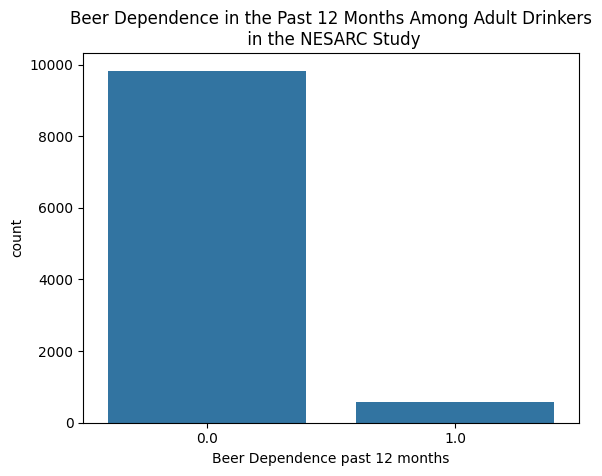

In [8]:


# bar chart code here
sns.countplot(x="S2BQ1B1", data=sub2)
plt.xlabel('Beer Dependence past 12 months')
plt.title('Beer Dependence in the Past 12 Months Among Adult Drinkers'+ '\n' + ' in the NESARC Study')

# Visualizing Quantitative Variable - histogram

# From Prac 2
# Create a secondary variable to estimate the number of beer consumed per month
# NUMBEERMO_EST

In [9]:
# A secondary variable multiplying the number of beers comsumed and the approx number of beers consumed/day
sub2['NUMBEERMO_EST']=sub2['BEER_FEQMO'] * sub2['S2AQ5D']

# Visualise the number of beers consumed per month (NUMBEERMO_EST) using a histogram

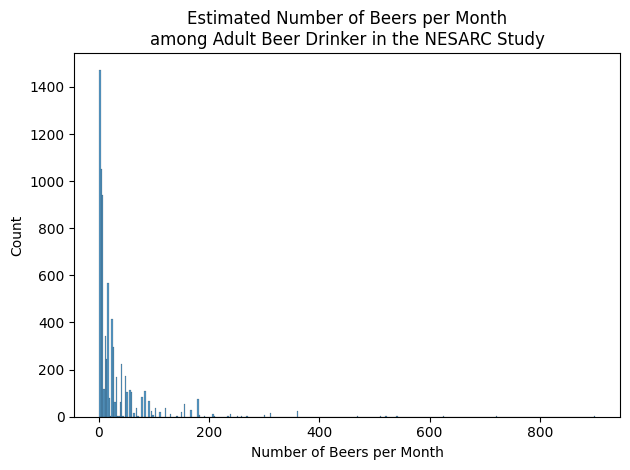

In [32]:


# Histogram plot code here
sns.histplot(sub2['NUMBEERMO_EST'].dropna(), kde=False)



plt.xlabel('Number of Beers per Month')
plt.title('Estimated Number of Beers per Month' + '\n' + 'among Adult Beer Drinker in the NESARC Study')
plt.tight_layout()

# Calculate the spread and centre of  NUMBEERMO_EST
# Use describe() 

In [11]:
# standard deviation and other descriptive statistics for quantitative variables
print('describe number of beers drinking per month')
desc1 = sub2['NUMBEERMO_EST'].describe()
print (desc1)

describe number of beers drinking per month
count   7303.000000
mean      27.765713
std       49.201312
min        1.000000
25%        4.000000
50%       12.000000
75%       28.000000
max      900.000000
Name: NUMBEERMO_EST, dtype: float64


# Alternative method
# Calculate descriptive statistics of  NUMBEERMO_EST
# Use mean(), std(), min(), max(), median(), mode()

In [12]:
print('mean')
mean1 = sub2['NUMBEERMO_EST'].mean()
print (mean1)

print('std')
std1 = sub2['NUMBEERMO_EST'].std()
print (std1)

print('min')
min1 = sub2['NUMBEERMO_EST'].min()
print (min1)

print ('max')
max1 = sub2['NUMBEERMO_EST'].max()
print (max1)

print ('median')
median1 = sub2['NUMBEERMO_EST'].median()
print (median1)

print ('mode')
mode1 = sub2['NUMBEERMO_EST'].mode()
print (mode1)


mean
27.765712720799673
std
49.2013122057718
min
1.0
max
900.0
median
12.0
mode
0   8.000000
Name: NUMBEERMO_EST, dtype: float64


# Calculate descriptive statistics for categorical data 
# S2BQ1B1 - Beer Dependence
# Use describe()

In [13]:
print ('describe beer dependence')
desc2 = sub2['S2BQ1B1'].describe()
print (desc2)

describe beer dependence
count    10406.000000
unique       2.000000
top          0.000000
freq      9829.000000
Name: S2BQ1B1, dtype: float64


# What if categorical data was considered as quantitative data
# S2BQ1B1 - Beer Dependence
# Convert S2BQ1B1 to quantitative data and 
# Calculate descriptive statistics  
# Use describe()

In [14]:
sub2['S2BQ1B1'] = pd.to_numeric(sub2['S2BQ1B1']) # convert a numerical variable to quantitatie

In [15]:
print ('describe beer dependence')
desc3 = sub2['S2BQ1B1'].describe()
print (desc3) #descriptor don't have sense

describe beer dependence
count   10406.000000
mean        0.055449
std         0.228865
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: S2BQ1B1, dtype: float64


# Visualising 2 variable
# Categorical -> Quantitative - Bar chart

# Create a secondary variable
# CARTONPERMONTH - number of beer carton consumed  per month 
# assume that there is 24 beer cans in a carton 

In [16]:
sub2['CARTONPERMONTH'] = sub2['NUMBEERMO_EST'] / 24

In [17]:
c2= sub2.groupby('CARTONPERMONTH').size()
print (c2)

CARTONPERMONTH
0.041667     477
0.083333     407
0.104167     414
0.125000     172
0.166667     429
            ... 
21.666667      1
22.500000      2
26.000000      1
30.000000      2
37.500000      1
Length: 75, dtype: int64


# Group CARTONPERMONTH into 5 groups
# 1 - 5 cartons
# 6 - 10 cartons
# 10 - 15 cartons
# 15 - 20 cartons
# 20 - 25 cartons
# 25 - 30 cartons
# 30 - max cartons

In [18]:
sub2['CARTONCATEGORY'] = pd.cut(sub2['CARTONPERMONTH'], [0, 5, 10, 20, 30, 147])

In [19]:
# change format from numeric to categorical
sub2['CARTONCATEGORY'] = sub2['CARTONCATEGORY'].astype('category')

# Print describe of CARTONCATEGORY

In [20]:
print('describe CARTONCATEGORY')
desc4 = sub2['CARTONCATEGORY'].describe()
print (desc4)

describe CARTONCATEGORY
count       7303
unique         5
top       (0, 5]
freq        7002
Name: CARTONCATEGORY, dtype: object


#  Print carton category counts

In [21]:
print('carton category counts')
c7 = sub2['CARTONCATEGORY'].value_counts(sort=False, dropna=True)
print(c7)

carton category counts
CARTONCATEGORY
(0, 5]       7002
(5, 10]       235
(10, 20]       58
(20, 30]        7
(30, 147]       1
Name: count, dtype: int64


# Chart of bar chart showing the relationship between carton of beer consumed per month (CARTONCATEGORY) and Beer Dependent (S2BQ1B1)

Text(30.47283950617284, 0.5, 'Proportion Beer Dependent')

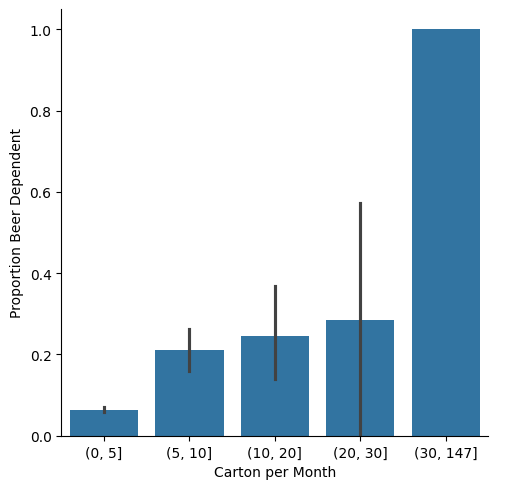

In [22]:
# bar chart code here
sns.catplot(x="CARTONCATEGORY", y="S2BQ1B1", data=sub2, kind="bar")
plt.xlabel('Carton per Month')
plt.ylabel('Proportion Beer Dependent')

# Visualising 2 variable
# Categorical -> Categorical - Bar chart

# Rename race from 1-5 to "White", "Black", "NatAm", "Asian", "Hispanic"

In [23]:
# you can rename categorical variable values for graphing if original values are not informative 
# first change the variable format to categorical if you haven’t already done so
sub2['ETHRACE2A'] = sub2['ETHRACE2A'].astype('category')
# second create a new variable (PACKCAT) that has the new variable value labels
sub2['ETHRACE2A']=sub2['ETHRACE2A'].cat.rename_categories(["White", "Black", "NatAm", "Asian", "Hispanic"])

# Function to get 'CARTON_ADAY)

In [24]:
def CARTON_ADAY (row):
   if row['BEER_FEQMO'] >= 30 :
      return 1
   elif row['BEER_FEQMO'] < 30 :
      return 0
      
sub2['CARTON_ADAY'] = sub2.apply (lambda row: CARTON_ADAY (row),axis=1)
      
c4= sub2.groupby('CARTON_ADAY').size()
print(c4)

CARTON_ADAY
0.000000    6897
1.000000     417
dtype: int64


# Bar Graph showing the relationship between race (ETHRACE2A) and 
# CARTON_ADAY

Text(30.667283950617275, 0.5, 'Proportion of drink beer a carton a day drinkers')

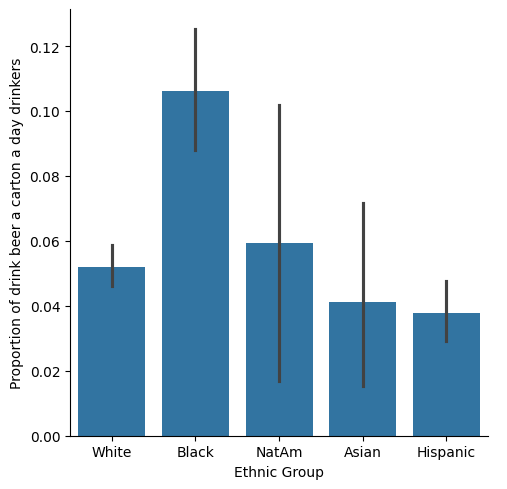

In [25]:
# bar graph code here
sns.catplot(x='ETHRACE2A', y='CARTON_ADAY', data=sub2, kind="bar")
plt.xlabel('Ethnic Group')
plt.ylabel('Proportion of drink beer a carton a day drinkers')

# Visualising 2 variable
# Categorical -> Quantitative - box plot

# convert age to category data type
# convert income (S1Q10A) to numeric data type

In [26]:
sub2['AGE'] = sub2['AGE'].astype('category') 
sub2['S1Q10A'] = pd.to_numeric(sub2['S1Q10A'])

# Box plot to show the relationship between age and income (S1Q10A) among adults aged 26 - 50 years old.

Text(0, 0.5, 'Income')

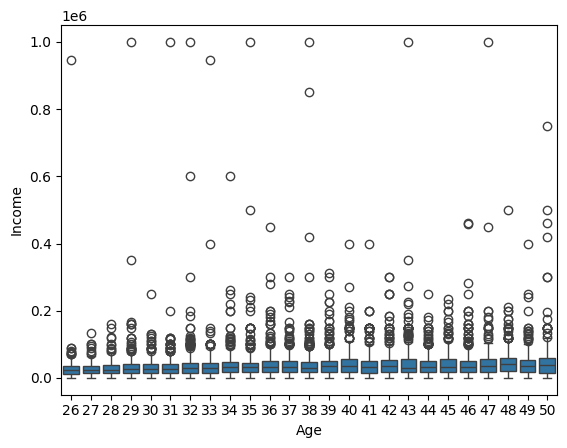

In [27]:

plt.figure()
sns.boxplot(x='AGE', y='S1Q10A', data=sub2)
#box plot code here
plt.xlabel('Age')
plt.ylabel('Income')

# Visualising 2 variable
# Quantitative -> Quantitative - scatter plot

# Read in gapminder.csv

In [28]:
pd.set_option('display.float_format', lambda x:'%.2f'%x)

gapminder = pd.read_csv('gapminder.csv', low_memory=False)
gapminder.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


# convert 'oilperperson' and 'relectricperperson' to numeric

In [29]:
gapminder['oilperperson'] = pd.to_numeric(gapminder['oilperperson'],errors='coerce')
gapminder['relectricperperson'] = pd.to_numeric(gapminder['relectricperperson'],errors='coerce')


# drop NAN data

In [30]:
gapminder_clean=gapminder.dropna()

# Scatter plot to show the relationship between Electrcity Use Per Person (relectricperperson) and Oil Use Per Person (oilperperson)

Text(0.5, 1.0, 'Scatterplot for the Association Between Electrcity Use Per Person\nand Oil Use Per Person')

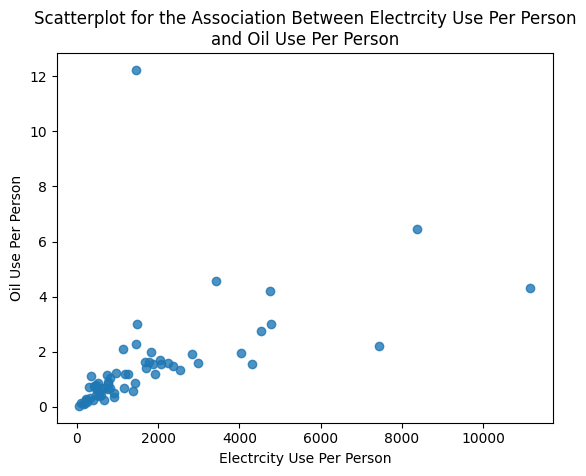

In [31]:

plt.figure()

#scatter plot code here
scat1 = sns.regplot(x="relectricperperson", y="oilperperson", fit_reg=False, data=gapminder_clean)
plt.xlabel('Electrcity Use Per Person')
plt.ylabel('Oil Use Per Person')
plt.title('Scatterplot for the Association Between Electrcity Use Per Person' + '\n' + 'and Oil Use Per Person')